# 📓 Linear Regression from Scratch

### 🎯 Objective
- Implement a linear regression model using gradient descent.
- Derive the gradient updates, write a scikit-learn-like class, and evaluate using synthetic data.
- Compare the result of the same with library code output
- Use R2-Score and Mean Absolute Percentage error as Performance metric on test data

## 📊 Generate Synthetic Data

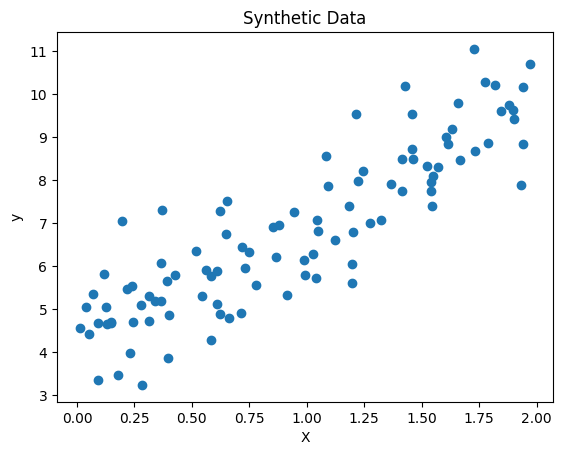

In [89]:

import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Plot
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Data")
plt.show()


## Do Train-Test Split (75%-25%)

In [90]:
# Write your code here
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)
print("X_train:",X_train.shape)
print("Y_train:",y_train.shape)
print("X_test:",X_test.shape)
print("y_test:",y_test.shape)





X_train: (75, 1)
Y_train: (75, 1)
X_test: (25, 1)
y_test: (25, 1)


## Do the Linear Regression with Scikit-Learn Library

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_percentage_error

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

mape = mean_absolute_percentage_error(y_test, y_pred)
print("Linear Regression MAPE:", mape)



print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)
print("R2 Score:", r2)




Linear Regression MAPE: 0.08475682819153892
Intercept: [4.16878815]
Coefficient: [[2.72587297]]
R2 Score: 0.8310990846073661


## Do Ridge and Lasso Regression and Compare the evaluation metrics in a table

In [92]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_percentage_error

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

results = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression"],
    "R2 Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_lasso)
    ],
    "MAPE (%)": [
        mean_absolute_percentage_error(y_test, y_pred_lr) * 100,
        mean_absolute_percentage_error(y_test, y_pred_ridge) * 100,
        mean_absolute_percentage_error(y_test, y_pred_lasso) * 100
    ]
})

display(results)

,Model,R2 Score,MAPE (%)
0,Linear Regression,0.831099,8.475683
1,Ridge Regression,0.825999,8.241190
2,Lasso Regression,0.809082,8.264002


## Custom Implementation

## 🧮 Derive the Gradient Updates
Use the chain rule to derive the gradients of the loss function (Mean Square Error):

$$ \text{Loss} = \frac{1}{N} \sum_{i=1}^{N} (y_i - (mx_i + c))^2 $$

Derive:
- ∂Loss/∂m
- ∂Loss/∂c

Write the derivation here/add screenshot of your derivation here:
### Mean Squared Error Loss

Loss:

$$
\text{Loss} = \frac{1}{N} \sum_{i=1}^{N} (y_i - (mx_i + c))^2
$$

---

### Define prediction

$$
\hat{y}_i = mx_i + c
$$

$$
e_i = y_i - \hat{y}_i
$$

$$
\text{Loss} = \frac{1}{N}\sum_{i=1}^{N} e_i^2
$$

---

# Gradient w.r.t m

Chain rule:

$$
\frac{\partial \text{Loss}}{\partial m}
=
\frac{1}{N}\sum_{i=1}^{N}
\frac{\partial (e_i^2)}{\partial m}
$$

$$
\frac{\partial (e_i^2)}{\partial m}
=
2 e_i \cdot \frac{\partial e_i}{\partial m}
$$

Since

$$
e_i = y_i - (mx_i + c)
$$

$$
\frac{\partial e_i}{\partial m} = -x_i
$$

Therefore

$$
\frac{\partial \text{Loss}}{\partial m}
=
-\frac{2}{N}\sum_{i=1}^{N}
x_i (y_i - (mx_i + c))
$$

---

# Gradient w.r.t c

$$
\frac{\partial \text{Loss}}{\partial c}
=
\frac{1}{N}\sum_{i=1}^{N}
\frac{\partial (e_i^2)}{\partial c}
$$

$$
\frac{\partial (e_i^2)}{\partial c}
=
2 e_i \cdot (-1)
$$

Therefore

$$
\frac{\partial \text{Loss}}{\partial c}
=
-\frac{2}{N}\sum_{i=1}^{N}
(y_i - (mx_i + c))
$$

## 🧠 Custom Linear Regression Class

In [93]:
import numpy as np

class MyLinearRegression:
    def __init__(self):
        self.m = 0.0
        self.c = 0.0
        self.losses = [] # Initialize a list to store losses

    def fit(self, X, y, lr=0.01, n_iters=1000):
        n = len(X)
        X = X.reshape(-1)
        y = y.reshape(-1)
        self.losses = [] # Clear losses for a new fit

        for _ in range(n_iters):
            y_pred = self.m * X + self.c

            # Calculate and store loss (Mean Squared Error)
            loss = np.mean((y - y_pred)**2)
            self.losses.append(loss)

            dm = (-2 / n) * np.sum(X * (y - y_pred))
            dc = (-2 / n) * np.sum(y - y_pred)

            self.m -= lr * dm
            self.c -= lr * dc

    def predict(self, X):
        X = X.reshape(-1)
        return self.m * X + self.c

    def fit_transform(self, X, y, lr=0.01, n_iters=1000):
        self.fit(X, y, lr, n_iters)
        return self.predict(X)

## 🔁 Train the Model and Visualize the Fit

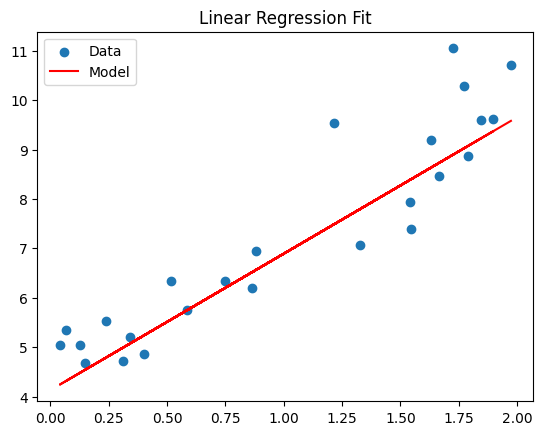

Learned coefficients (m, c): 2.760287211333097 4.131338540026423


In [94]:

model = MyLinearRegression()
model.fit(X_train, y_train, lr=0.1, n_iters=100)

# Predictions
y_pred = model.predict(X_test)

# Plot
plt.scatter(X_test, y_test, label="Data")
plt.plot(X_test, y_pred, color="red", label="Model")
plt.legend()
plt.title("Linear Regression Fit")
plt.show()

# Print coefficients
print("Learned coefficients (m, c):", model.m, model.c)


## 📉 Plot the Loss Curve

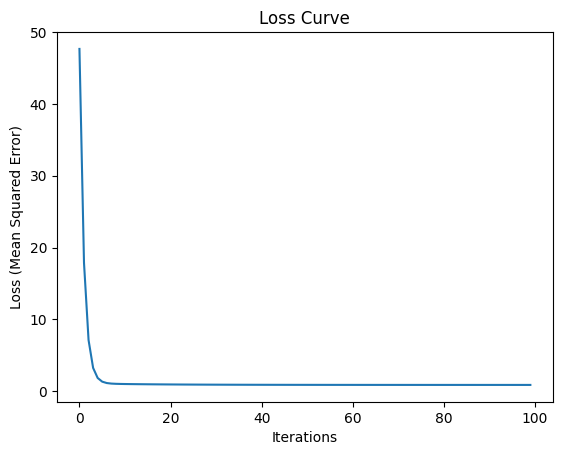

In [95]:
import matplotlib.pyplot as plt

# Plot the loss curve
plt.plot(range(len(model.losses)), model.losses)
plt.xlabel("Iterations")
plt.ylabel("Loss (Mean Squared Error)")
plt.title("Loss Curve")
plt.show()

## 🌟 Bonus Task: Stochastic Gradient Descent
Implement a class `MyLinearRegressionSGD` that uses one training sample per iteration to update weights.

In [96]:
class MyLinearRegressionSGD(MyLinearRegression):
    def fit(self, X, y, lr=0.01, n_iters=1000):
        # Initialize parameters
        if X.ndim == 1:
            X = X.reshape(-1, 1)

        self.m = np.random.randn(X.shape[1], 1)
        self.c = np.random.randn(1, 1)

        N = len(X)
        self.losses = [] # Corrected from self.losshistory

        for n in range(n_iters):
            # Select a random sample for SGD
            random_index = np.random.randint(N)
            X_sample = X[random_index].reshape(1, -1)
            y_sample = y[random_index].reshape(1, -1)

            # Prediction for the single sample
            y_pred_sample = X_sample @ self.m + self.c

            # Gradients for the single sample
            dm = -2 * (X_sample.T @ (y_sample - y_pred_sample))
            dc = -2 * np.sum(y_sample - y_pred_sample)

            # Update parameters
            self.m -= lr * dm
            self.c -= lr * dc

            # Calculate and store loss over the entire dataset (for monitoring)
            y_pred_full = X @ self.m + self.c
            loss = (1/N) * np.sum((y - y_pred_full)**2)
            self.losses.append(loss) # Corrected from self.loss_history.append(loss)

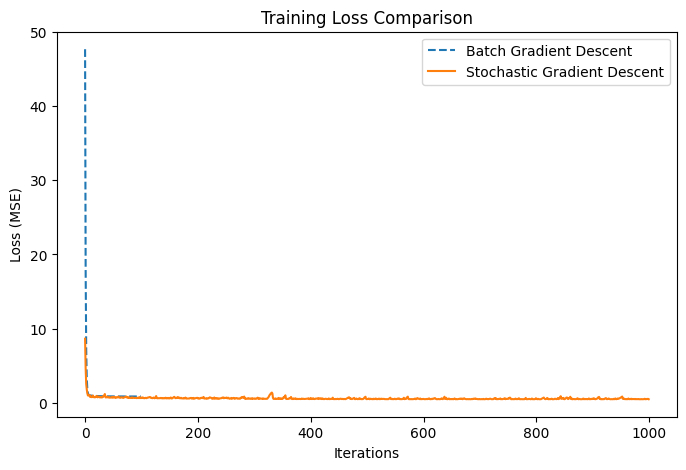

In [97]:
plt.figure(figsize=(8,5))

plt.plot(model.losses, linestyle='--', label="Batch Gradient Descent")
plt.plot(model_sgd.losses, label="Stochastic Gradient Descent")

plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss Comparison")
plt.legend()

plt.show()

## Visualize the prediction result of Library version and Custom regression code created

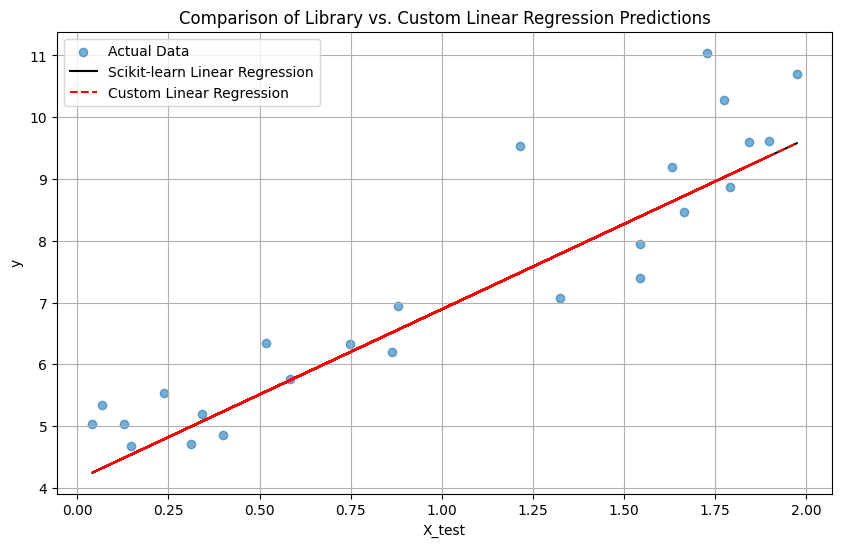

In [102]:
import matplotlib.pyplot as plt

# Assuming lr (scikit-learn LinearRegression) and model (MyLinearRegression) are already trained

# Get predictions from scikit-learn model
y_pred_sk = model.predict(X_test)

# Get predictions from custom model
y_pred_custom = model.predict(X_test).reshape(-1, 1) # Ensure consistent shape

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label="Actual Data", alpha=0.6)
plt.plot(X_test, y_pred_sk, color='black', linestyle='-', label="Scikit-learn Linear Regression")
plt.plot(X_test, y_pred_custom, color='red', linestyle='--', label="Custom Linear Regression")

plt.xlabel("X_test")
plt.ylabel("y")
plt.title("Comparison of Library vs. Custom Linear Regression Predictions")
plt.legend()
plt.grid(True)
plt.show()

## ✅ Checklist
- [ ] Did linear regression using scikit-learn API
- [ ] Did Ridge and Lasso regression and compiled the result (R2 and MAPE) as a table
- [ ] Derived gradients using chain rule
- [ ] Implemented custom Linear Regression class
- [ ] Trained using gradient descent
- [ ] Visualized predictions and loss
- [ ] Implemented stochastic gradient descent (bonus)
- [ ] Visualized predictions and loss for stochastic gradient descent (bonus)
- [ ] Visualize the prediction result of Library version and custom version